In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from control import mag2db

Todas as libs usadas podem ser instaladas atraves de pip ou anaconda

# Etapas A e B

Etapa A

In [ ]:
# Lendo o arquivo, transformando-o em um np.array unidimensional e obtendo sua taxa de amostragem
sample_rate, raw_data = wavfile.read('Beat One.wav')
raw_data = raw_data[:, 0]
sample_rate

44100

Etapa B

In [ ]:
new_rate = 22500 # Definindo o valor alvo para a taxa de amostragem
downsampling_factor = round(sample_rate/new_rate)
# Carregando a musica em uma nova variavel, aplicando a taxa de amostragem desejada (22.5 kHz)
resampled_data = signal.resample_poly(raw_data, 1, downsampling_factor)  

# Etapas C e D

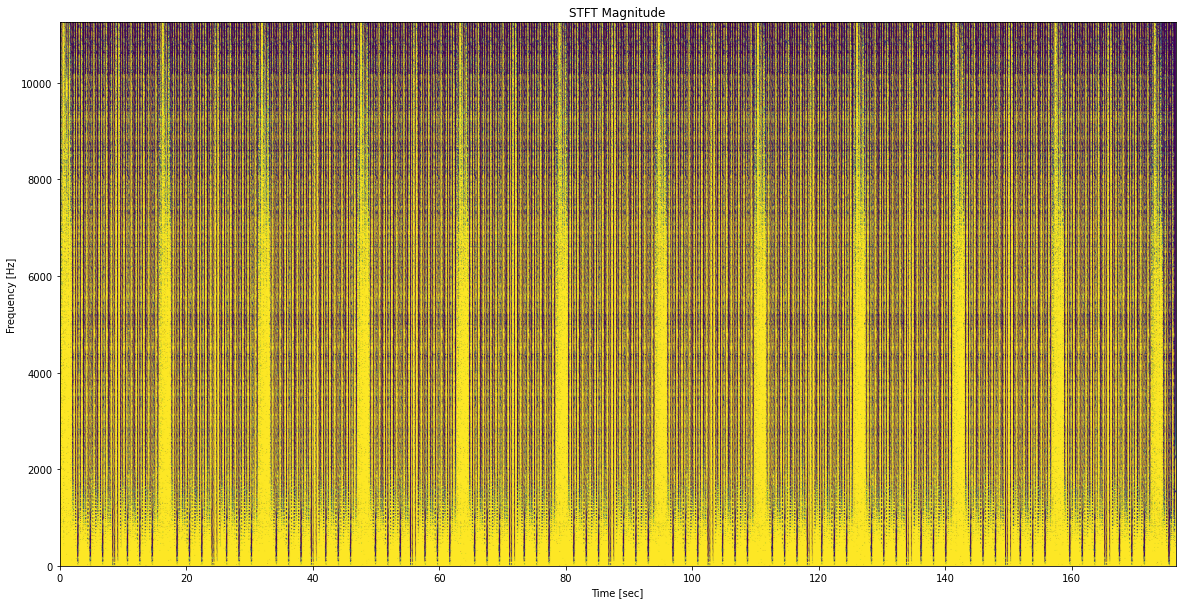

In [ ]:
# Realizando a transformação de fourier de tempo curto com uma janela deslizando de 2048 amostras e sobreposição de 75% e amarzenando-a na variavel Zxx
freq, time, Zxx = signal.stft(resampled_data, fs=new_rate, nperseg=2048, noverlap=0.75*2048)

#Plotando o espectograma
plt.figure(figsize=(20, 10))
plt.pcolormesh(time, freq, np.abs(Zxx)**2, vmin=0, vmax=2 * np.sqrt(2), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
# Confirmando a frequência mais alta como a frequência de Nyquist e o tamanho desejado para o espectro
print(f"O espectro de frequências contem {freq.size} frequências, sendo {freq.max()} a mais alta.")

O espectro de frequências contem 1025 frequências, sendo 11250.0 a mais alta.


In [ ]:
# Extraindo o valor absoluto a partir da transformação de Fourier, elevando-o ao quadrado, convertendo-o para decibeis e então armazenando-o em uma variavel
Zxx_abs = np.abs(Zxx)**2 # Etapa C
Zxx_db = mag2db(Zxx_abs) # Etapa D

Questão 1

In [ ]:
# Media de todos os valores da matriz da etapa C
np.sum(Zxx_abs)/Zxx_abs.size

26669.36361284292

Questão 2

In [ ]:
# Media de todos os valores da matriz da etapa D
np.sum(Zxx_db)/Zxx_db.size

6.896096195119073

# Etapas E e F

Etapa E

In [ ]:
# Adquirindo as frequências maximas para cada coluna da matriz e amazenando-as em um novo vetor
Zxx_max = Zxx_db.max(axis=0)

Etapa F

In [ ]:
# Achando o valor minimo, valor maximo e os 3 quartis do vetor e definindo-os como variaveis
Zxx_q0 = Zxx_max.min() 
Zxx_q4 = Zxx_max.max()
Zxx_q1 = np.median(Zxx_max[Zxx_max < np.median(Zxx_max)])
Zxx_q2 = np.median(Zxx_max)
Zxx_q3 = np.median(Zxx_max[Zxx_max > np.median(Zxx_max)])
# O metodo np.percentile() não retornava o valor correto para q=75, por isso decidi optar por esse caminho

# Definindo e imprimindo os intervalos [q0, q1), [q1, q2), [q2, q3) e [q3, q4)
print("Intervalo [q0, q1):", Zxx_max[np.logical_and(Zxx_max >= Zxx_q0, Zxx_max < Zxx_q1)], "\n\n",
      "Intervalo [q1, q2):", Zxx_max[np.logical_and(Zxx_max >= Zxx_q1, Zxx_max < Zxx_q2)], "\n\n",
      "Intervalo [q2, q3):", Zxx_max[np.logical_and(Zxx_max >= Zxx_q2, Zxx_max < Zxx_q3)], "\n\n",
      "Intervalo [q3, q4):", Zxx_max[np.logical_and(Zxx_max >= Zxx_q3, Zxx_max < Zxx_q4)])

Intervalo [q0, q1): [ 85.1197609  105.81645422 107.86368719 ... 101.66082369  89.59369992
  66.94823208] 

 Intervalo [q1, q2): [125.24699675 127.04196074 113.13269152 ... 110.75913073 112.6179595
 110.48893548] 

 Intervalo [q2, q3): [135.04102207 129.89324173 130.44325532 ... 129.11087377 131.51738185
 131.84218475] 

 Intervalo [q3, q4): [148.96561302 155.57244693 158.10645571 ... 141.32388705 147.58747373
 138.96309127]


In [ ]:
Zxx_intervals = np.empty(Zxx_max.size, dtype=int) # Criando um vetor novo a partir do original
Zxx_intervals[np.logical_and(Zxx_max >= Zxx_q0, Zxx_max < Zxx_q1)] = 0 # Definindo os elementos no intervalo [q0, q1) como 0
Zxx_intervals[np.logical_and(Zxx_max >= Zxx_q1, Zxx_max < Zxx_q2)] = 1 # Definindo os elementos no intervalo [q1, q2) como 1
Zxx_intervals[np.logical_and(Zxx_max >= Zxx_q2, Zxx_max < Zxx_q3)] = 2 # Definindo os elementos no intervalo [q1, q3) como 2
Zxx_intervals[np.logical_and(Zxx_max >= Zxx_q3, Zxx_max < Zxx_q4)] = 3 # Definindo os elementos no intervalo [q3, q4) como 3
Zxx_intervals[Zxx_max >= Zxx_q4] = 4 # Definindo os elementos no intervalo [q4] como 4
np.sort(Zxx_intervals)

array([0, 0, 0, ..., 3, 3, 4])

Questão 3

In [ ]:
# Media do vetor adquirido na etapa E
Zxx_max.mean()

121.19475978143802

Questão 4

In [ ]:
# Quartil superior do vetor da etapa E
Zxx_q3

135.26572284796015

Questão 5

In [ ]:
# Obtendo a proporção de valores dentro do vetor criado na etapa E que estão no maior intervalo
biggest_interval = np.bincount(Zxx_intervals).argmax() # Definindo o maior intervalo
np.count_nonzero(Zxx_intervals==biggest_interval)/Zxx_intervals.size # Dividindo o numero de elmentos nesse intervalo pelo total do vetor

0.2500967367470657

# Etapas G e H

Etapa G

In [ ]:
# Identificando as janelas que mudaram o intervalo
a = Zxx_max == Zxx_max[Zxx_max >= Zxx_q1].min()
b = Zxx_max == Zxx_max[Zxx_max >= Zxx_q2].min()
c = Zxx_max == Zxx_max[Zxx_max >= Zxx_q3].min()
d = Zxx_max == Zxx_max[Zxx_max >= Zxx_q4].min()
# Criando o novo vetor em que as janelas identificadas são 1 enquanto as outras são 0 e removendo o primeiro elemento
interval_changes = (a + b + c + d).astype(int)[1:]
interval_changes

array([0, 0, 0, ..., 0, 0, 0])

Etapa H

In [ ]:
n = int(30 * interval_changes.size / 176) # definindo o tamanho da janela n como equivalente a 30 segundos
running_mean = np.convolve(interval_changes, np.ones((n,))/n, mode='valid')
running_mean

array([0.      , 0.      , 0.      , ..., 0.000757, 0.000757, 0.000757])

Questão 6

In [ ]:
# Pico do vetor obtido na etapa H
running_mean.max()

0.001514004542013626

Questão 7

In [ ]:
# Instante em segundos que contem o pico da questão 6
np.where(running_mean==running_mean.max())[0][0]/(interval_changes.size / 176)

77.46542827657379

Questão 8

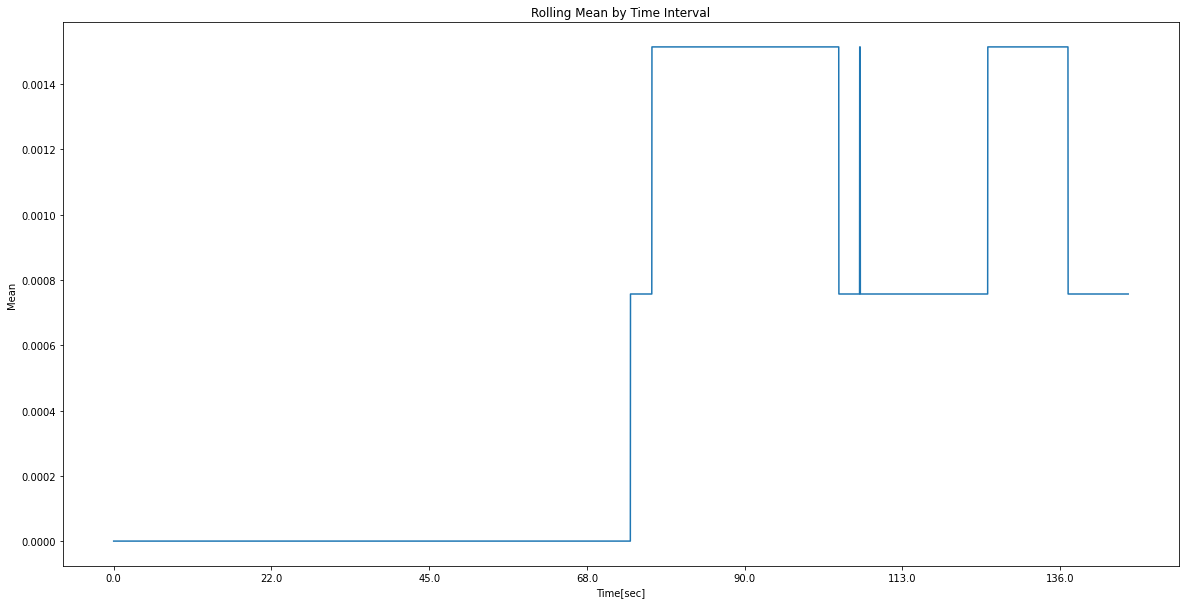

In [44]:
# Plotando a media movel pelo tempo
plt.figure(figsize=(20,10))
plt.plot(running_mean)
plt.xticks([0, 1000, 2000, 3000, 4000, 5000, 6000], [0.0, 22.0, 45.0, 68.0, 90.0, 113.0, 136.0])
plt.title("Rolling Mean by Time Interval")
plt.ylabel("Mean")
plt.xlabel("Time[sec]")
plt.show()